# Introduksjon til filtrering
Denne notebook'en er ment som en introduksjon til filtrering av "støyete" målinger. Vi viser tankegangen bak alfa- og alfa-beta-filter.

Vi trenger et eksempel på støyete målinger - og i første omgang ser vi på en konstant verdi.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function for generating a noisy constant value
def noisy_constant_value(n,dt,x0,sigma_noise):
    t = np.arange(n)*dt
    x_true = x0*np.ones(t.shape)
    x = x_true + np.random.normal(scale=sigma_noise,size=t.shape)
    return t,x,x_true

In [3]:
# Create a noisy measurement of a constant value
t,x,x_true = noisy_constant_value(n=100,dt=0.1,x0=5,sigma_noise=1)

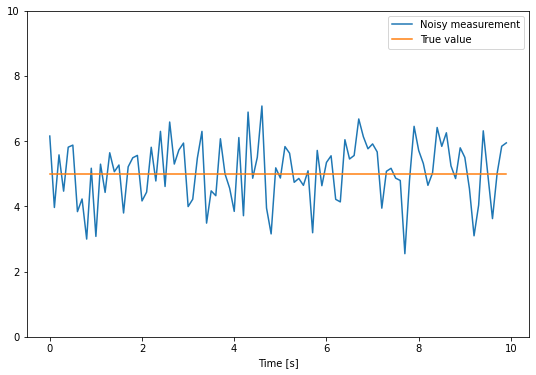

In [5]:
# Plot example noisy constant value
plt.figure(figsize=(9,6))
plt.plot(t,x, label = 'Noisy measurement')
plt.plot(t,x_true, label = 'True value')
plt.ylim(0,10)
plt.xlabel('Time [s]')
plt.legend()
plt.show()

Vi tenker oss at vi ikke har tilgang på alle målingene samtidig, men at vi får tilgang på en og en måling om gangen, og skal prøve å estimere den sanne verdien ut fra dette.

Hvis vi skal filtrere målingene, kan vi tenke at vi "mikser" estimatet som vi har fra før sammen med litt av de nye målingene. Det kan vi gjøre med følgende ligning:

$$\hat{x}_{n} = (1-\alpha) \cdot \hat{x}_{n-1} + \alpha \cdot z_n$$

I ligninga over er $\hat{x}_{n}$ estimatet for denne iterasjonen, $\hat{x}_{n-1}$ er estimatet vi hadde i forrige iterasjon, $z_n$ er målingen for denne iterasjonen, og $\alpha$ er hvor mye "vekt" de nye målingene får. Hvis vi for eksempel setter $\alpha$ lik 0.1, kunne vi skrive ligningen over på denne måten:


Nytt estimat = 90% av gammelt estimat + 10% av ny måling 


Legg merke til at hvis målingen er identisk med estimatet fra forrige iterasjon, vil ikke estimatet endre seg. Vi skal se at et slikt filter vil "stabilisere" seg rundt den sanne verdien, hvis denne er konstant. 

Vi kan skrive om ligninga over på følgende måte: 

$$\hat{x}_{n} = \hat{x}_{n-1} + \alpha (z_n - \hat{x}_{n-1}) = \hat{x}_{n-1} + \alpha \Delta x$$

der $\Delta \hat{x} = z_n - \hat{x}_{n-1}$ er en slags "mismatch" mellom måling $z_n$ og forrige estimat $\hat{x}_{n-1}$.
I klassen under implementerer vi et filter av denne typen. 

In [6]:
class SimpleFilter:
    def __init__(self,x0=0, alpha=0.1):
        self.x_est = x0         # Initial value for estimate
        self.alpha = alpha      # Filter parameter, in range [0,1]
        
    def estimate_value(self,zn):
        # Calculate new estimate based on new measurement
        self.x_est += self.alpha*(zn - self.x_est)
        return self.x_est

In [20]:
# Filter the noisy measurement using a SimpleFilter
sf = SimpleFilter(x0=0, alpha=0.05)
x_est = []
for xi in x:
    x_est.append(sf.estimate_value(xi))

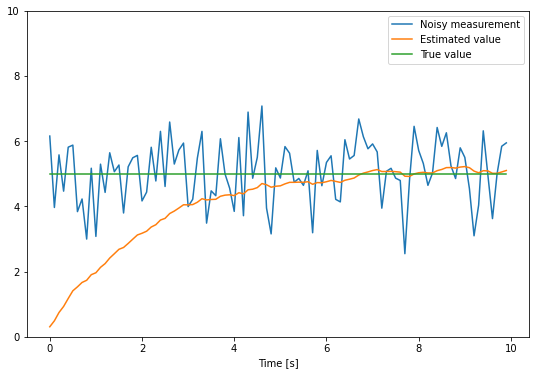

In [21]:
# Plot measured, estimated and true value
plt.figure(figsize=(9,6))
plt.plot(t,x,label = 'Noisy measurement')
plt.plot(t,x_est,label = 'Estimated value')
plt.plot(t,x_true, label = 'True value')
plt.xlabel('Time [s]')
plt.ylim(0,10)
plt.legend()
plt.show()

Vi kan se at den estimerte verdien starter nært 0, siden dette er filterets "default" start-verdi, men at det konvergerer mot den sanne verdien. Hvis vi velger en høy $\alpha$-verdi, vil filteret konvergere fortere, men det vil også gi estimater med mer støy. Hvis vi setter startverdien til filteret (init_val) nærmere den sanne verdien, vil vi også se at filteret konvergerer fortere. 

Men hva skjer dersom vi ikke har en konstant verdi, men en verdi som endrer seg med konstant endringsrate (konstant "fart")?

In [22]:
# Function for generating a noisy value with constant rate of change
def noisy_constantspeed_value(n,dt,x0,v,sigma_noise):
    t = np.arange(n)*dt
    x_true = x0 + v*t
    x = x_true + np.random.normal(scale=sigma_noise,size=t.shape)
    return t,x,x_true

In [48]:
# Create a noisy measurement of a value with constant rate of change
t,x,x_true = noisy_constantspeed_value(n=100,dt=0.1,x0=10,v=2,sigma_noise=1)

In [49]:
# Filter the noisy measurement using a SimpleFilter
sf = SimpleFilter(alpha=0.05)
x_est = []
for xi in x:
    x_est.append(sf.estimate_value(xi))

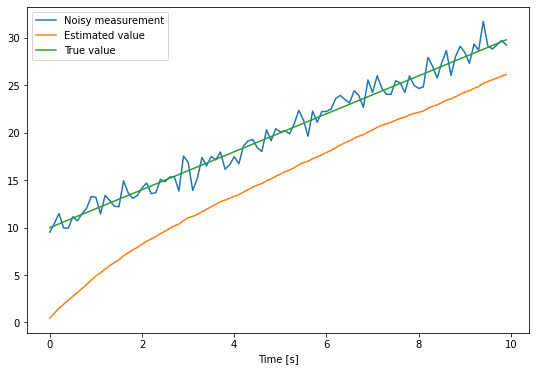

In [50]:
# Plot measured, estimated and true value
plt.figure(figsize=(9,6))
plt.plot(t,x,label = 'Noisy measurement')
plt.plot(t,x_est,label = 'Estimated value')
plt.plot(t,x_true, label = 'True value')
plt.xlabel('Time [s]')
plt.legend()
plt.show()

Vi kan se her at filteret "følger" den sanne verdien (grønn linje), men at det hele tiden ligger "bakpå". Det skyldes at filteret hele tiden legger mest vekt på tidligere estimater, og bare tar med litt av de nye målingene. Dersom den sanne verdien øker med konstant hastighet, vil filteret alltid underestimere den sanne verdien. Igjen kan man gjøre et kompromiss når man setter verdien av $\alpha$: Høy verdi vil gi mindre "forsinkelse", men vil også gi mer støy i estimatet.

Hva skjer dersom man ikke har en verdi som endrer seg med konstant fart, men heller en "svingende" verdi?

In [26]:
# Function for generating a noisy sinusoidal value
def noisy_sine_value(n,dt,x0,A,f,sigma_noise):
    t = np.arange(n)*dt
    x_true = x0 + A*np.sin(2*np.pi*f*t)
    x = x_true + np.random.normal(scale=sigma_noise,size=t.shape)
    return t,x,x_true

In [27]:
# Create a noisy measurement of a sinusoidal value
t,x,x_true = noisy_sine_value(n=150,dt=0.1,x0=5,A=5,f=0.1,sigma_noise=1)

In [28]:
# Filter the noisy measurement using a SimpleFilter
sf = SimpleFilter(alpha=0.05)
x_est = []
for xi in x:
    x_est.append(sf.estimate_value(xi))

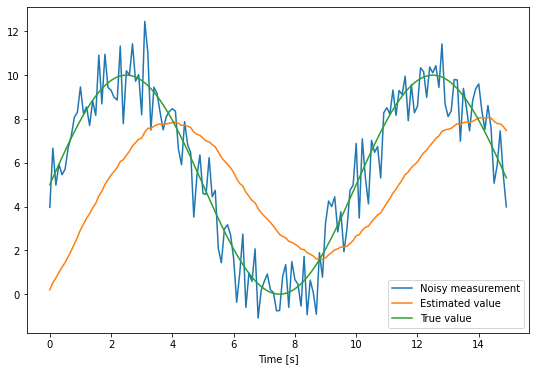

In [29]:
# Plot measured, estimated and true value
plt.figure(figsize=(9,6))
plt.plot(t,x,label = 'Noisy measurement')
plt.plot(t,x_est,label = 'Estimated value')
plt.plot(t,x_true, label = 'True value')
plt.xlabel('Time [s]')
plt.legend()
plt.show()

Igjen kan vi se at filteret "henger etter". For en sinusfunksjon betyr det en faseforskyvning mellom den sanne og den estimerte verdien.

Hvis vi skal prøve å unngå å henge etter, må filteret ha en slags idé om av endringsraten (farten) til verdien den prøver å estimere. Vi skal se på hvordan vi kan estimere både posisjon og fart samtidig.

# Teori: Filter som estimerer både posisjon og fart 

Dersom filteret "vet" at verdien øker med en viss (konstant) fart $v$, kan det bedre forutsi hva neste verdi burde være. 

$$\hat{x}_{n+1} = \hat{x}_{n} + v \cdot \Delta t$$

Men hvis vi ikke vet hva farten er, må vi estimere denne samtidig som vi prøver å estimere selve verdien! Det kan man gjøre etter følgende logikk: 

Vi definerer "mismatch" mellom sann og estimert verdi:

$$\Delta \hat{x} = x_n - \hat{x}_n$$

Vi antar at vi har et perfekt estimat av forrige posisjon ($\hat{x}_{n-1} = x_{n-1}$), men at vårt estimat av farta ($\hat{v}$) er feil. I praksis vil ikke estimatet av posisjon være perfekt, men i gjennomsnitt / over tid vil det fungere likevel. Vi får følgende $\Delta x$: 

$$ \Delta \hat{x} = (x_{n-1} + v \cdot \Delta t) - (x_{n-1} + \hat{v} \cdot \Delta t) $$

$$ \Delta \hat{x} = v \cdot \Delta t - \hat{v} \cdot \Delta t = (v - \hat{v}) \cdot \Delta t $$

Hvis vi nå definerer en "mismatch" $\Delta \hat{v}$ mellom sann og estimert hastighet, kan vi skrive om den siste ligningen:

$$\Delta \hat{v} = (v - \hat{v}) = \frac{\Delta \hat{x}}{\Delta t} = \frac{x_n - \hat{x}_n}{\Delta t}$$

Hvis vi nå ønsket å korrigere vårt forrige estimat for farta ($\hat{v}_{n-1}$), slik at vi fikk et nytt estimat $\hat{v}_{n}$ som er lik den sanne verdien $v$, kunne vi snu om på ligningen over og sette 

$$ \hat{v}_n = \hat{v}_{n-1} + \Delta \hat{v} = \hat{v}_{n-1} + \frac{x_n - \hat{x}_n}{\Delta t} $$

MEN: Vi har ikke tilgang på de sanne verdiene $x_n$ i ligningen over. Det eneste vi har er våre (støyete) målinger $z_n$. Vi kan sette disse inn for $x_n$, men da må vi være litt "konservative", på samme måte som vi var med alfa-filteret vårt over. Vi definerer en ny filterparameter, $\beta$, som sier hvordan vi skal "vekte" tidligere estimater av fart mot nye målinger:

$$ \hat{v}_n = \hat{v}_{n-1} + \beta \cdot \frac{z_n - \hat{x}_n}{\Delta t} $$

# Oppsummering: Filter som estimerer både posisjon og fart 
Hvis vi skal estimere både posisjon og fart samtidig, må vi kombinere metoden for å estimere posisjon som vi allerede har gjort i SimpleFilter med vår nye metode for å estimere fart. La oss da anta at vi befinner oss i iterasjon $n$. Fra forrige iterasjon, $n-1$, har vi et estimat av hvilken verdi vi burde ha i denne iterasjonen. Vi kaller dette estimatet $x_{n,n-1}$. Men dette estimatet stemmer ikke nødvendigvis med målingen $z_n$ som gjøres i denne iterasjonen. Vi "oppdaterer" esimatet vårt for posisjon på denne måten:

$$\hat{x}_{n} = \hat{x}_{n,n-1} + \alpha (z_n - \hat{x}_{n,n-1})$$

der $\hat{x}_{n}$ betyr "estimat for iterasjon $n$, oppdatert med måling fra iterasjon $n$". Vi oppdaterer estimatet for fart med ligningen som vi nettopp fant over:

$$ \hat{v}_n = \hat{v}_{n-1} + \beta \cdot \frac{z_n - \hat{x}_{n,n-1}}{\Delta t} $$

De to oppdateringene over er det som kalles "state update". Til slutt må vi også forutsi ("predict") hvilken posisjon vi får i neste iterasjon:

$$\hat{x}_{n+1,n} = \hat{x}_{n} + \hat{v}_n \cdot \Delta t$$

Legg merke til at når vi går inn i neste iterasjon ($n+1$), brukes denne forutsigelsen i $\alpha$-ligningen over. Siden vi antar at farta $v$ er konstant, trenger vi ikke gjøre tilsvarende forutsigelse for fart. 

In [30]:
class SpeedFilter:
    """ Filter which estimates 2 states: Position and speed """
    def __init__(self,dt = 1, x0=0, v0=0, alpha=0.1, beta = 0.05):
        self.dt = dt          # Time step
        self.x_curr = x0      # Initial estimate for posision
        self.v = v0           # Initial estimate for speed
        self.alpha = alpha    # Filter parameter for posision
        self.beta = beta      # Filter parameter for speed
        self.x_next = x0 + v0*dt  # Initial value for "next estimate" of posision
                
    def estimate_position(self,zi):
        # Find "mismatch" between measurement and estimate for this iteration
        delta_x = zi - self.x_next
        
        # Update current estimates of posision and speed
        self.x_curr = self.x_next + self.alpha*delta_x
        self.v = self.v + self.beta*(delta_x/self.dt)
        
        # Predict position for next iteration
        self.x_next = self.x_curr + self.v*self.dt
        
        # Return current position
        return self.x_curr

La oss nå prøve å generere en ny støyete måling av et objekt som beveger seg, og å bruke det nye filteret for å estimere posisjonen til objektet. Vi genererer nå 200 samples (20 sekunder), mens vi hadde 100 samples (10 sekunder) i eksempelet over. Dette er for å se hvordan estimatet utvikler seg over litt lengre tid.

In [88]:
# Create a noisy measurement of a value with constant rate of change
dt = 0.1
t,x,x_true = noisy_constantspeed_value(n=200,dt=dt,x0=10,v=2,sigma_noise=1)

In [89]:
# Filter the noisy measurement using a SpeedFilter
sf = SpeedFilter(dt=dt,alpha=0.05,beta=0.002)
x_est = []
for xi in x:
    x_est.append(sf.estimate_position(xi))

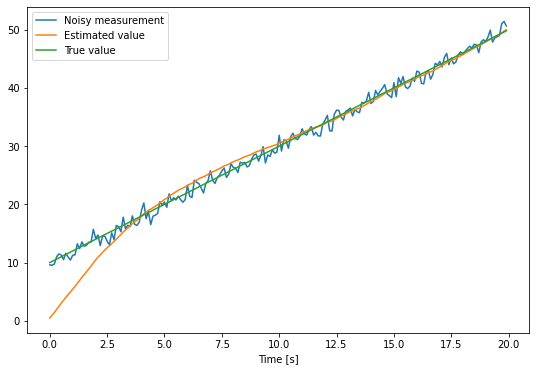

In [90]:
# Plot measured, estimated and true value
plt.figure(figsize=(9,6))
plt.plot(t,x,label = 'Noisy measurement')
plt.plot(t,x_est,label = 'Estimated value')
plt.plot(t,x_true, label = 'True value')
plt.xlabel('Time [s]')
plt.legend()
plt.show()

Vi ser at estimatet ikke lenger "henger etter" den sanne verdien, selv om vi bruker samme verdi for $\alpha$ som tidligere. Ulike verdier for $\alpha$ og $\beta$ vil gi ulike kompromiss mellom hvor "jevn" verdien er og hvor lite "forsinkelse" det er i filteret. Høye verdier av beta kan også gi tydelige oscillasjoner rundt den sanne verdien (prøv gjerne selv med en høyere verdi!). 

Ideelt kunne man tenke seg at $\alpha$ og $\beta$ burde være ganske store i begynnelsen, for at filteret raskt skal finne et estimat som er "ganske riktig", men at de burde bli gradvis mindre etterhvert slik at estimatet får så lite støy som mulig. Dette er det som gjøres i et Kalman-filter ($\alpha$ og $\beta$ endres for hver iterasjon).